In [1]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [11]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [13]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [14]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2586 - acc: 0.9244
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.1036 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.0687 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0493 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0375 - acc: 0.9886


In [15]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)

10000/10000 [==============================] - 0s 40us/step
test_acc: 0.9782


In [16]:
# 0D张量（标量）
import numpy as np
x=np.array(12)
x

array(12)

In [17]:
x.ndim

0

In [18]:
# 1D张量（向量）
x=np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

In [22]:
# 2D张量（矩阵）
x=np.array([[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]])
x.ndim

2

In [25]:
# 3D张量与更高维张量
x=np.array([[[5,78,2,34,0],
            [6,79,3,35,1],
            [7,80,4,36,2]],
           [[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]],
           [[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]]])
print('x.ndim:',x.ndim)
print('x.shape:',x.shape)

x.ndim: 3
x.shape: (3, 3, 5)


In [26]:
print('train_images.shape:',train_images.shape)

train_images.shape: (60000, 784)


In [27]:
print('train_images.ndim:',train_images.ndim)

train_images.ndim: 2


In [28]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
print('train_images.ndim:',train_images.ndim)
print('train_images.shape:',train_images.shape)

train_images.ndim: 3
train_images.shape: (60000, 28, 28)


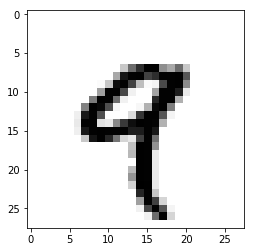

In [30]:
# 用Matplotlib库来显示这个3D向量中的第4个数字
digit=train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [31]:
# 在NumPy中操作张量
my_slice=train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [32]:
# 等同于上面的例子
my_slice=train_images[10:100,:,:]
print(my_slice.shape)

(90, 28, 28)


In [33]:
# 等同于上面的例子
my_slice=train_images[10:100,0:28,0:28]
print(my_slice.shape)

(90, 28, 28)


In [34]:
# 在所有图像的右下角选出14像素✖️14像素的区域
my_slice=train_images[:,14:,14:]
print(my_slice.shape)

(60000, 14, 14)


In [35]:
# 使用负数索引
# 负数索引表示与当前轴终点的相对位置
# 在图像中心裁剪出14像素✖️14像素的区域
my_slice=train_images[:,7:-7,7:-7]
print(my_slice.shape)

(60000, 14, 14)


In [36]:
# 深度学习模型不会同时处理整个数据集，而是将数据拆分成小批量
# 通常来说，深度学习中所有数据张量的第一个轴（0轴）都是样本轴
batch=train_images[:128]
# 下一个批量
batch=train_images[128:256]
# ...
# 第n个批量
# batch=train_images[128*n:128*(n+1)]

In [38]:
# 逐元素运算

# 对逐元素relu运算的简单实现
# relu(x)=max(x,0)
def naive_relu(x):
    # x是一个NumPy的2D张量
    assert len(x.shape)==2
    
    # 避免覆盖输入张量
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]=max(x[i,j],0)
    return x

# 对于加法采用同样的简单实现
def naive_add(x,y):
    # x和y是NumPy的2D张量
    assert len(x.shape)==2
    assert x.shape==y.shape
    
    # 避免覆盖输入张量
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[i,j]
    return x

In [39]:
# 使用NumPy数组内置函数进行直接运算，替代上述方法
# 内置函数运算速度非常快
import numpy as np

# 逐元素的相加
z=x+y

# 逐元素的relu
z=np.maximum(z,0.)

NameError: name 'y' is not defined

In [40]:
# 广播

# 2D张量x与向量y相加，较小的张量y被广播（虚拟进行），以匹配较大张量的形状
# 简单实现
def naive_add_matrix_and_vector(x,y):
    # x是一个NumPy的2D张量
    assert len(x.shape)==2
    # y是一个NumPy向量
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]
    
    # 避免覆盖张量
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[j]
    return x

In [41]:
# 使用NumPy数组代替上述简单实现
import numpy as np

# x是形状为(64,3,32,10)的随机张量
x=np.random.random((64,3,32,10))
# y是形状为(32,10)的随机张量
y=np.random.random((32,10))

# 输出z的形状是(64,3,32,10),与x相同
z=np.maximum(x,y)

In [ ]:
# 张量点积
# 在NumPy、Keras、Theano和TensorFlow中，都是用*实现逐元素乘积
# 在NumPy和Keras中，都是用标准的dot运算符来实现点积
import numpy as np

z=np.dot(x,y)

In [42]:
# 张量变形
x=np.array([[0.,1.],
           [2.,3.],
           [3.,5.]])
print(x.shape)

(3, 2)


In [43]:
x=x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [3.],
       [5.]])

In [44]:
x=x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 3., 5.]])

In [ ]:
# 张量转置